<a href="https://colab.research.google.com/github/samyamaryal/Emotion-Classifier/blob/main/emotion_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [102]:
import pandas as pd
import numpy as np
import tensorflow
import sklearn
import string
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
import nltk
# The NLTK data package includes a pre-trained Punkt tokenizer for English.
# punkt had to be manually downloaded using the command below
# same with stopwords
nltk.download('punkt')
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [3]:
df = pd.read_csv('ISEAR.csv')

In [4]:
df.head()

,0,joy,On days when I feel close to my partner and other friends. \nWhen I feel at peace with myself and also experience a close \ncontact with people whom I regard greatly.
0,1,fear,Every time I imagine that someone I love or I ...
1,2,anger,When I had been obviously unjustly treated and...
2,3,sadness,When I think about the short time that we live...
3,4,disgust,At a gathering I found myself involuntarily si...
4,5,shame,When I realized that I was directing the feeli...


In [5]:
#Renaming the columns
df.columns = ['No', 'emotion', 'word']
df.head()

,No,emotion,word
0,1,fear,Every time I imagine that someone I love or I ...
1,2,anger,When I had been obviously unjustly treated and...
2,3,sadness,When I think about the short time that we live...
3,4,disgust,At a gathering I found myself involuntarily si...
4,5,shame,When I realized that I was directing the feeli...


In [6]:
emotion_labels = df['emotion']
sentences = df['word']

We need to create an embedding vector for all the words. But before that, let us preprocess the text.

DATAFRAME PREPROCESSING DONE

CORPUS PREPROCESSING

In [7]:
#Lowercase

sentences = sentences.apply(lambda x: x.lower())
sentences

0       every time i imagine that someone i love or i ...
1       when i had been obviously unjustly treated and...
2       when i think about the short time that we live...
3       at a gathering i found myself involuntarily si...
4       when i realized that i was directing the feeli...
                              ...                        
7440    last week i had planned to play tennis and had...
7441    when i was ill and had to stay at the hospital...
7442    a few days back i was waiting for the bus at t...
7443    a few days back i had a tutorial class and the...
7444    once i quarrelled with my sister and after thi...
Name: word, Length: 7445, dtype: object

In [11]:
#Punctuation removal

def removepunctuation(sentence):
  #iterate over every single character to see if it is a punctuation or not, and then concatenate them using "join"
   punctuationfree="".join([i for i in sentence if i not in string.punctuation])
   return punctuationfree

sentences = sentences.apply(removepunctuation)

In [12]:
sentences

0       every time i imagine that someone i love or i ...
1       when i had been obviously unjustly treated and...
2       when i think about the short time that we live...
3       at a gathering i found myself involuntarily si...
4       when i realized that i was directing the feeli...
                              ...                        
7440    last week i had planned to play tennis and had...
7441    when i was ill and had to stay at the hospital...
7442    a few days back i was waiting for the bus at t...
7443    a few days back i had a tutorial class and the...
7444    once i quarrelled with my sister and after thi...
Name: word, Length: 7445, dtype: object

In [13]:
#Tokenization

sentences = sentences.apply(word_tokenize)

In [18]:
index = 55
print(sentences[index], emotion_labels[index])

['i', 'told', 'a', 'friend', 'that', 'i', 'was', 'going', 'to', 'a', 'party', 'and', 'he', 'would', 'not', 'enjoy', 'himself', 'if', 'he', 'came', 'along', 'he', 'understood', 'that', 'he', 'would', 'not', 'have', 'fitted', 'in', 'and', 'there', 'was', 'something', 'in', 'that'] shame


In [36]:
stop_words = stopwords.words('english')
len(stop_words)

179

In [46]:
# there are a lot of stopwords in this dataset. let us remove that using stopwords from nltk

preprocessed_tokens = []

def stopwordremoval(words):
  for i in words:
    # iterate over each individual element in the dataframe, and return a list of elements that do not contain stop words
    post_removal = [word for word in i if word not in stop_words]
    # remove commas from the post_removal list
    list_of_tokens = [" ".join(post_removal)]
    # generate a list that contains all the tokens' list
    preprocessed_tokens.append(list_of_tokens)
  return preprocessed_tokens


In [47]:
prepro = []
prepro = stopwordremoval(sentences)

CORPUS PREPROCESSED, NOW WE VECTORIZE

In [48]:
len(prepro)

7445

In [49]:
prepro

[['every time imagine someone love could contact serious illness even death'],
 ['obviously unjustly treated possibility elucidating'],
 ['think short time live relate periods life think use short time'],
 ['gathering found involuntarily sitting next two people expressed opinions considered low discriminating'],
 ['realized directing feelings discontent partner way trying put blame instead sorting feeliings'],
 ['feel guilty realize consider material things important caring relatives feel selfcentered'],
 ['girlfriend taken exam went parents place'],
 ['first time realized meaning death'],
 ['car overtaking another forced drive road'],
 ['recently thought hard work takes study one wants try something else read theoretical book english understand'],
 ['found bristle liver paste tube'],
 ['tired unmotivated shouted girlfriend brought negative sides character actually important'],
 ['think study enough weekend think able accomplished something time'],
 ['pass examination think well'],
 ['

In [50]:
preprocessed_sentences = pd.DataFrame(prepro)

In [59]:
preprocessed_sentences.loc[[55]]

,0
55,told friend going party would enjoy came along...


In [60]:
emotion_labels[55]

'shame'

In [ ]:
# Now that we have both the preprocessed sentences and emotion labels, we now start building the neural network to train this.

In [62]:
from tensorflow.keras import layers

In [63]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [64]:
preprocessed_sentences[0]

0       every time imagine someone love could contact ...
1       obviously unjustly treated possibility elucida...
2       think short time live relate periods life thin...
3       gathering found involuntarily sitting next two...
4       realized directing feelings discontent partner...
                              ...                        
7440    last week planned play tennis booked tennis co...
7441                        ill stay hospital period time
7442    days back waiting bus bus stop getting bus pre...
7443    days back tutorial class teacher randomly assi...
7444     quarrelled sister deliberately messed belongings
Name: 0, Length: 7445, dtype: object

In [ ]:
'''# TRIAL CODE BLOCK TO VERIFY THE WORKING OF TFIDF VECTORIZER

from sklearn.feature_extraction.text import TfidfVectorizer
corpus = ['This is the first document.',
    'This document is the second document.',
    'And this is the third one.',
    'Is this the first document?',
]
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(corpus)
vectorizer.get_feature_names_out()

trial = X.toarray()
trialdf = pd.DataFrame(trial)'''

In [65]:
vectorizer = TfidfVectorizer(lowercase=False, max_features = 5000)
vectorized_sentences = vectorizer.fit_transform(preprocessed_sentences[0])

In [66]:
preprocessed_sentences[0]

0       every time imagine someone love could contact ...
1       obviously unjustly treated possibility elucida...
2       think short time live relate periods life thin...
3       gathering found involuntarily sitting next two...
4       realized directing feelings discontent partner...
                              ...                        
7440    last week planned play tennis booked tennis co...
7441                        ill stay hospital period time
7442    days back waiting bus bus stop getting bus pre...
7443    days back tutorial class teacher randomly assi...
7444     quarrelled sister deliberately messed belongings
Name: 0, Length: 7445, dtype: object

In [67]:
type(vectorized_sentences)

scipy.sparse._csr.csr_matrix

In [ ]:
print(vectorized_sentences)

In [69]:
x_input = []
x_input = vectorized_sentences.toarray()

LABEL RESHAPING

In [70]:
labels_reshaped = emotion_labels.values.reshape(-1, 1)

ONE HOT ENCODING THE LABEL VARIABLES

In [81]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(sparse_output=True)
encoded_emotion_labels = ohe.fit_transform(labels_reshaped).toarray()

In [82]:
ohe.categories_

[array(['anger', 'disgust', 'fear', 'guilt', 'joy', 'sadness', 'shame'],
       dtype=object)]

In [83]:
labels = ohe.categories_
label_columns = np.array(labels).ravel()

In [97]:
finaldf = pd.DataFrame(x_input)
finaldf[label_columns] = encoded_emotion_labels

In [98]:
X = finaldf[finaldf.columns[0:5000]]
y = finaldf[finaldf.columns[5000:]]

In [142]:
#Train test split
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = 0.3)

**NEURAL NETWORK PORTION**


In [143]:
train_accuracies = []
val_accuracies = []

In [155]:
output_dim = 7
EPOCHS = 25
VALSPLIT = 0.2
LAYER_ACTIVATION = 'softmax'

model = tensorflow.keras.Sequential([
  layers.InputLayer(input_shape = (5000, )),
  layers.Dense(125, activation = LAYER_ACTIVATION),
  layers.Dropout(0.5),
  layers.Dense(125, activation = LAYER_ACTIVATION),
  layers.Dropout(0.5),
  layers.Dense(125, activation = LAYER_ACTIVATION),
  layers.Dense(output_dim)])

model.compile(optimizer = 'adam',
              loss = 'categorical_crossentropy',
              metrics = 'accuracy')

hist = model.fit(x = X_train, 
                 y = Y_train,
                 batch_size = 32,
                 epochs = EPOCHS,
                 validation_split = VALSPLIT)

Epoch 1/25
131/131 [==============================] - 4s 17ms/step - loss: 9.1109 - accuracy: 0.1408 - val_loss: 9.4731 - val_accuracy: 0.1448
Epoch 2/25
131/131 [==============================] - 2s 14ms/step - loss: 9.1109 - accuracy: 0.1408 - val_loss: 9.4731 - val_accuracy: 0.1448
Epoch 3/25
131/131 [==============================] - 2s 17ms/step - loss: 9.1109 - accuracy: 0.1408 - val_loss: 9.4731 - val_accuracy: 0.1448
Epoch 4/25
131/131 [==============================] - 2s 17ms/step - loss: 9.1109 - accuracy: 0.1408 - val_loss: 9.4731 - val_accuracy: 0.1448
Epoch 5/25
131/131 [==============================] - 2s 13ms/step - loss: 9.1109 - accuracy: 0.1408 - val_loss: 9.4731 - val_accuracy: 0.1448
Epoch 6/25
131/131 [==============================] - 2s 13ms/step - loss: 9.1109 - accuracy: 0.1408 - val_loss: 9.4731 - val_accuracy: 0.1448
Epoch 7/25
131/131 [==============================] - 2s 14ms/step - loss: 9.1109 - accuracy: 0.1408 - val_loss: 9.4731 - val_accuracy: 0.1448

In [145]:
results = model.evaluate(X_test, Y_test)
results

70/70 [==============================] - 0s 5ms/step - loss: 1.2978 - accuracy: 0.5116


[1.2977524995803833, 0.511638343334198]

In [146]:
print(hist.history['val_accuracy'])

[0.45062321424484253, 0.5225311517715454, 0.5330776572227478, 0.539789080619812, 0.5302013158798218, 0.5474592447280884, 0.5417066216468811, 0.5196548700332642, 0.5167785286903381, 0.5014381408691406, 0.5023969411849976, 0.5062320232391357, 0.5081495642662048, 0.5081495642662048, 0.5081495642662048, 0.49760305881500244, 0.49760305881500244, 0.5014381408691406, 0.49952059984207153, 0.4899328947067261, 0.4822627007961273, 0.488015353679657, 0.5023969411849976, 0.49760305881500244, 0.49568551778793335]


In [147]:
train_accuracies.extend(hist.history['accuracy'])
val_accuracies.extend(hist.history['val_accuracy'])

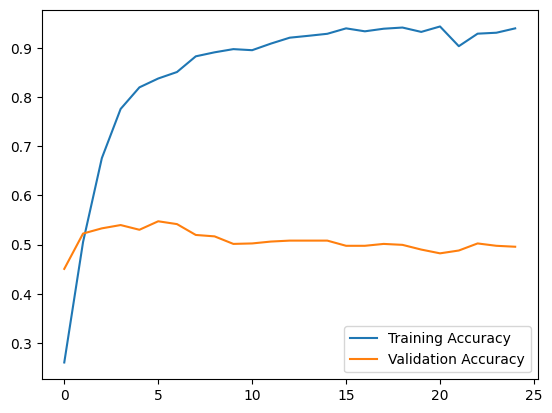

In [148]:
plt.plot(hist.history['accuracy'], label = 'Training Accuracy')
plt.plot(hist.history['val_accuracy'], label = 'Validation Accuracy')
plt.legend()

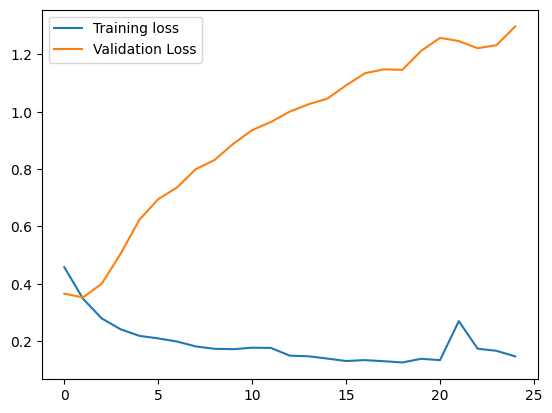

In [149]:
plt.plot(hist.history['loss'], label = 'Training loss')
plt.plot(hist.history['val_loss'], label = 'Validation Loss')
plt.legend()